In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import torch
from tqdm import tqdm

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
from sklearn.manifold import MDS
from sklearn.datasets import make_swiss_roll
from sklearn.metrics.pairwise import euclidean_distances

In [ ]:
X = np.array([[0, 0, 0], [0, 0, 1], [1, 1, 1], [0, 1, 0], [0, 1, 1]])
dist_manhattan = euclidean_distances(X)

# embeddings
mds = MDS(n_components=2, random_state=0, dissimilarity='precomputed')
X_transform = mds.fit_transform(dist_manhattan)

print(mds.stress_)
print(X_transform)

0.18216844548575456
[[ 0.72521687  0.52943352]
 [ 0.61640884 -0.48411805]
 [-0.9113603  -0.47905115]
 [-0.2190564   0.71505714]
 [-0.21120901 -0.28132146]]


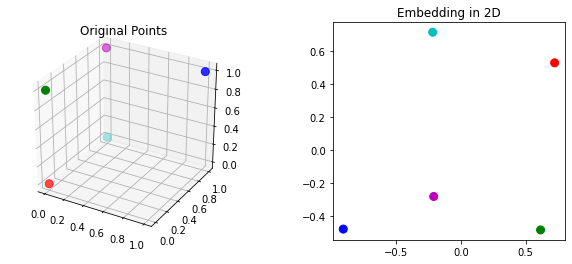

0.18216844548575456


In [ ]:
colors = ['r', 'g', 'b', 'c', 'm']
size = [64, 64, 64, 64, 64]
fig = plt.figure(2, (10,10))
ax = fig.add_subplot(221, projection='3d')
plt.scatter(X[:,0], X[:,1], zs=X[:,2], s=size, c=colors)
plt.title('Original Points')

ax = fig.add_subplot(222)
plt.scatter(X_transform[:,0], X_transform[:,1], s=size, c=colors)
plt.title('Embedding in 2D')

fig.subplots_adjust(wspace=.4, hspace=0.5)
plt.show()

print(mds.stress_)

In [ ]:
#@markdown $$\text{Stress}_\delta(x_1,x_2,...,x_n)=\Biggl(\sum_{i,j} \bigl(\delta_{ij} - ||x_i - x_j|| \bigr)^2 \Biggr)^{1/2}$$

In [ ]:
class MMDS(torch.nn.Module):
    def __init__(self, amount, dim=2):
      super().__init__()
      self.X = torch.nn.Parameter(torch.rand(amount, dim))

    def forward(self, D) :
      pred_D = torch.cdist(self.X, self.X)
      stress = torch.float_power(torch.sum(torch.float_power(D - pred_D, 2)), 1/2)
      return stress

In [ ]:
X, y = make_swiss_roll(n_samples=200, noise=0.05, random_state=0)
X = torch.from_numpy(X)
D = torch.cdist(X, X)

In [ ]:
fig = px.scatter_3d(None, x=X[:,0], y=X[:,1], z=X[:,2], color=y,)

fig.update_layout(dict(plot_bgcolor = 'white'), 
                  autosize=False,
                  width=800,
                  height=800)

fig.update_traces(marker=dict(size=3, 
                              line=dict(color='black', width=0.1)))

fig.update(layout_coloraxis_showscale=False)
fig.show()

In [ ]:
model = MMDS(len(X), 2)
optimizer = torch.optim.SGD(model.parameters(), lr=0.005)

stress_values = []

for epoch in tqdm(range(1000000), desc='Training Epochs'):
    optimizer.zero_grad()

    stress = model(D)
    stress_values.append(stress.item())
    stress.backward() # gradient

    optimizer.step() # better points

Training Epochs: 100%|██████████| 1000000/1000000 [14:58<00:00, 1113.11it/s]


In [ ]:
X_transform = model.X.detach().numpy()
print('\n\nStress =', stress.item())



Stress = 663.6561210559285


In [ ]:
mds = MDS(n_components=2, metric=True, n_init=4, max_iter=10000, eps=1e-5, random_state=0, dissimilarity='euclidean')
X_sklearn = mds.fit_transform(X)
print("Sklearn_stress =", mds.stress_ ** 0.5)
print("iters = ", mds.n_iter_)

Sklearn_stress = 469.2757479178608
iters =  179


In [ ]:
fig = px.scatter(stress_values[:30000])

fig.update_layout(dict(plot_bgcolor = 'white'), 
                  autosize=False,
                  width=800,
                  height=500,
                  coloraxis_showscale=False,
                  showlegend=False)

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black',
                 title="Кол-во итераций")

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black',
                 title="Stress")

fig.update_traces(marker=dict(size=1, line=dict(color='black', width=1)))

fig.show()

In [ ]:
# Create a scatter plot
fig = px.scatter(None, x=X_transform[:,0], y=X_transform[:,1], opacity=1, color=y)

# Change chart background color
fig.update_layout(dict(plot_bgcolor = 'white'), 
                  autosize=False,
                  width=800,
                  height=800,
                  coloraxis_showscale=False)

# Update axes lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

# Update marker size
fig.update_traces(marker=dict(size=7,
                             line=dict(color='black', width=0.2)))

fig.show()

In [ ]:
# Create a scatter plot
fig = px.scatter(None, x=X_sklearn[:,0], y=X_sklearn[:,1], opacity=1, color=y)

# Change chart background color
fig.update_layout(dict(plot_bgcolor = 'white'), 
                  autosize=False,
                  width=800,
                  height=800,
                  coloraxis_showscale=False)

# Update axes lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

# Update marker size
fig.update_traces(marker=dict(size=7,
                             line=dict(color='black', width=0.2)))

fig.show()